# Red Wine Quality Classsication
**Machine Learning Project: Predictive Analytics**

oleh Muhammad Bagus Adi Prayoga

## A. Business Understanding

Saat ini banyak wine beredar di pasaran, sehingga penilaian terhadap wine mutlak diperlukan, karena hal ini memberikan pengaruh yang sangat besar terhadap keputusan pembelian konsumen. [1]

Dalam hal ini, kita akan memprediksi kualitas dari sebuah wine berdasarkan beberapa atribut yang ada. Sehingga, kita dapat mengetahui apakah wine tersebut memiliki kualitas yang baik atau tidak.

Berdasarkan permasalahan tersebut, penulis ingin membuat sebuah model machine learning yang dapat memprediksi kualitas dari sebuah wine sehingga dapat memberikan informasi kepada konsumen apakah wine tersebut layak untuk dibeli atau tidak.

## B. Data Understanding
Sumber Datasets: https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
# import datasets
df = pd.read_csv('bin_wineQualityReds.csv')
df.head()

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,label
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


Isi dari kolom pada dataset:
- fixed acidity
- volatile acidity
- citric acid
- residual sugar
- chlorides
- free sulfur dioxide
- total sulfur dioxide
- density
- pH
- sulphates
- alcohol

Target Variable:
- **label (0 atau 1)**, dimana 0 adalah wine yang buruk dan 1 adalah wine yang baik

### Exploratory Data Analysis: Descriptive Statistics

In [3]:
# melihat bentuk data
df.shape

(1599, 12)

In [4]:
# cek info data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed.acidity         1599 non-null   float64
 1   volatile.acidity      1599 non-null   float64
 2   citric.acid           1599 non-null   float64
 3   residual.sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free.sulfur.dioxide   1599 non-null   float64
 6   total.sulfur.dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  label                 1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
# melihat null value
df.isna().sum()

fixed.acidity           0
volatile.acidity        0
citric.acid             0
residual.sugar          0
chlorides               0
free.sulfur.dioxide     0
total.sulfur.dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
label                   0
dtype: int64

In [6]:
# melihat statistik deskriptif
df.describe()

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,label
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,0.534709
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.498950
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,0.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,0.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,1.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,1.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,1.000000


Dari tahapan ini didapatkan informasi bahwa:
- Dataset ini memiliki 1599 baris dan 12 kolom
- Tidak terdapat missing value pada dataset ini

### Exploratory Data Analysis: Univariate Analysis
#### Label Distribution

   count  percentage
1    855   53.470919
0    744   46.529081


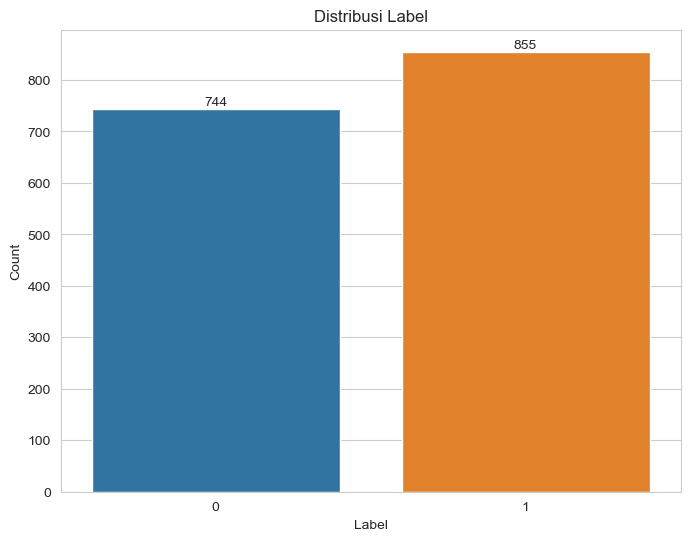

In [7]:
# melihat persentase label
count = df['label'].value_counts()
percentage = df['label'].value_counts(normalize=True) * 100
df_label = pd.DataFrame({'count': count, 'percentage': percentage})
print(df_label)

# countplot untuk melihat distribusi label
plt.figure(figsize=(8, 6))
sns.set_style('whitegrid')
sns.countplot(x='label', data=df)
plt.bar_label(plt.gca().containers[0])
plt.title('Distribusi Label')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

#### Feature Distribution

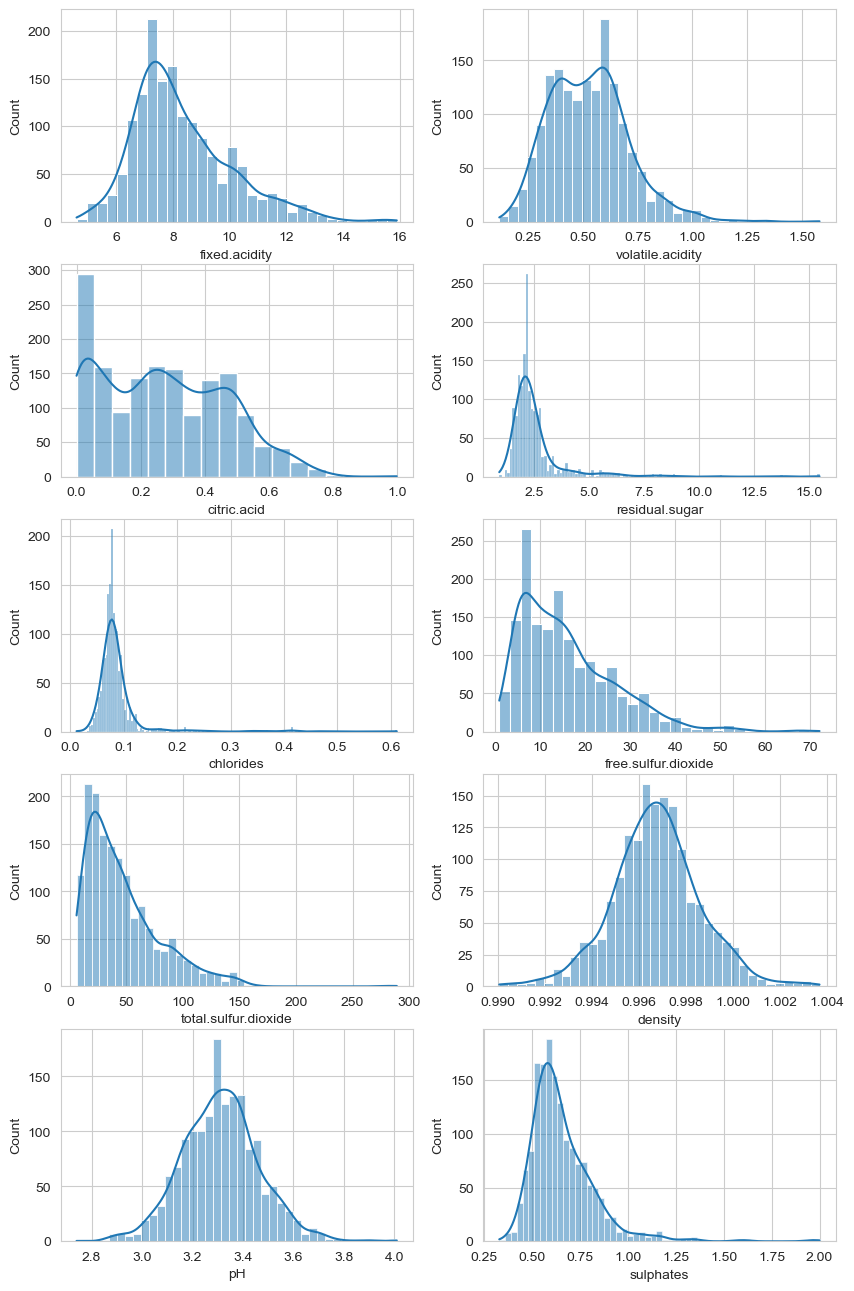

In [8]:
# histogram untuk melihat distribusi data fitur
sns.set_style('whitegrid')
fig, ax = plt.subplots(5, 2, figsize=(10, 16))
for variable, subplot in zip(df.columns, ax.flatten()):
    if variable == 'label':
        continue
    sns.histplot(x=variable, data=df, ax=subplot, kde=True)

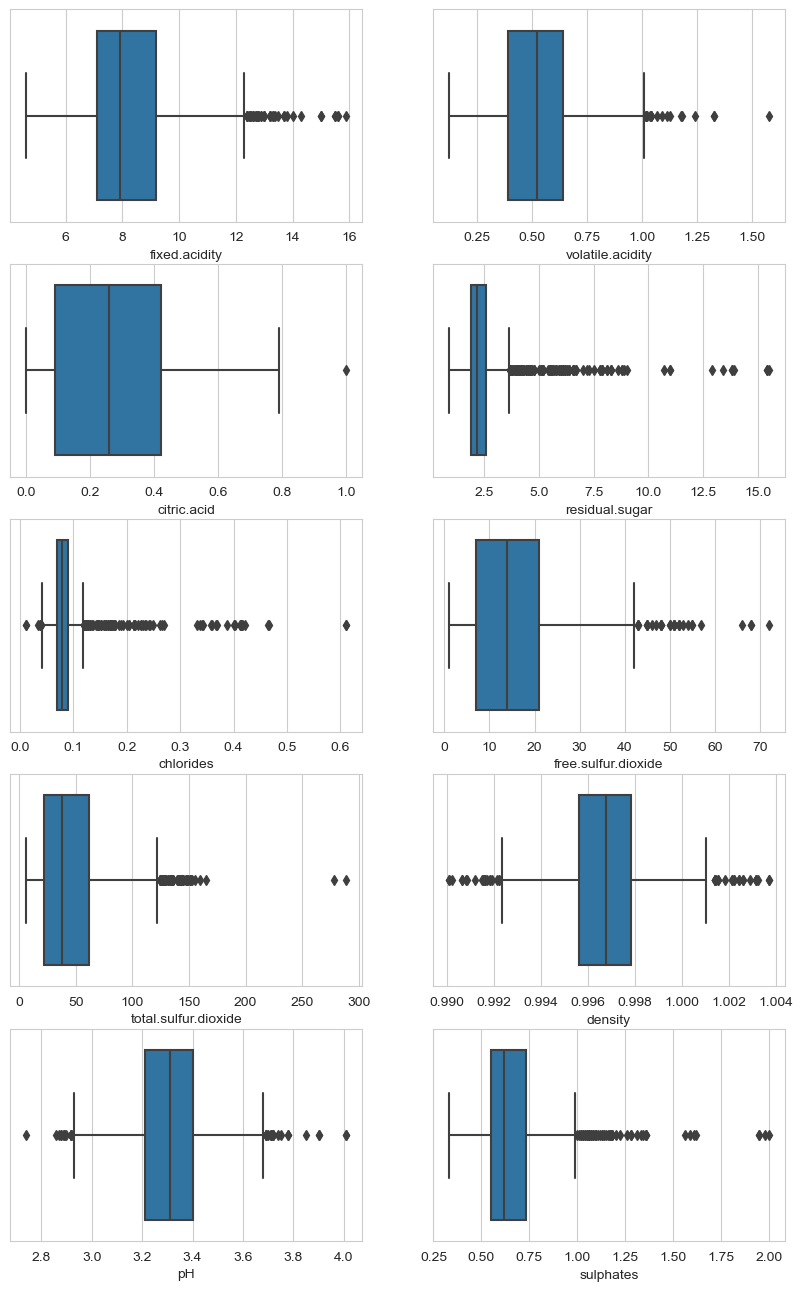

In [9]:
# boxplot untuk mendeteksi outlier
sns.set_style('whitegrid')
fig, ax = plt.subplots(5, 2, figsize=(10, 16))
for variable, subplot in zip(df.columns, ax.flatten()):
    if variable == 'label':
        continue
    sns.boxplot(x=variable, data=df, ax=subplot)

Informasi yang didapatkan dari tahapan Univariat Analysis:
- Distribusi label pada dataset ini seimbang, dimana perbandingan antara wine yang baik dan wine yang buruk adalah 53:47.
- Terdapat outlier pada hampir semua kolom pada dataset ini, sehingga perlu dilakukan **handling outlier**.

### Exploratory Data Analysis: Multivariate Analysis

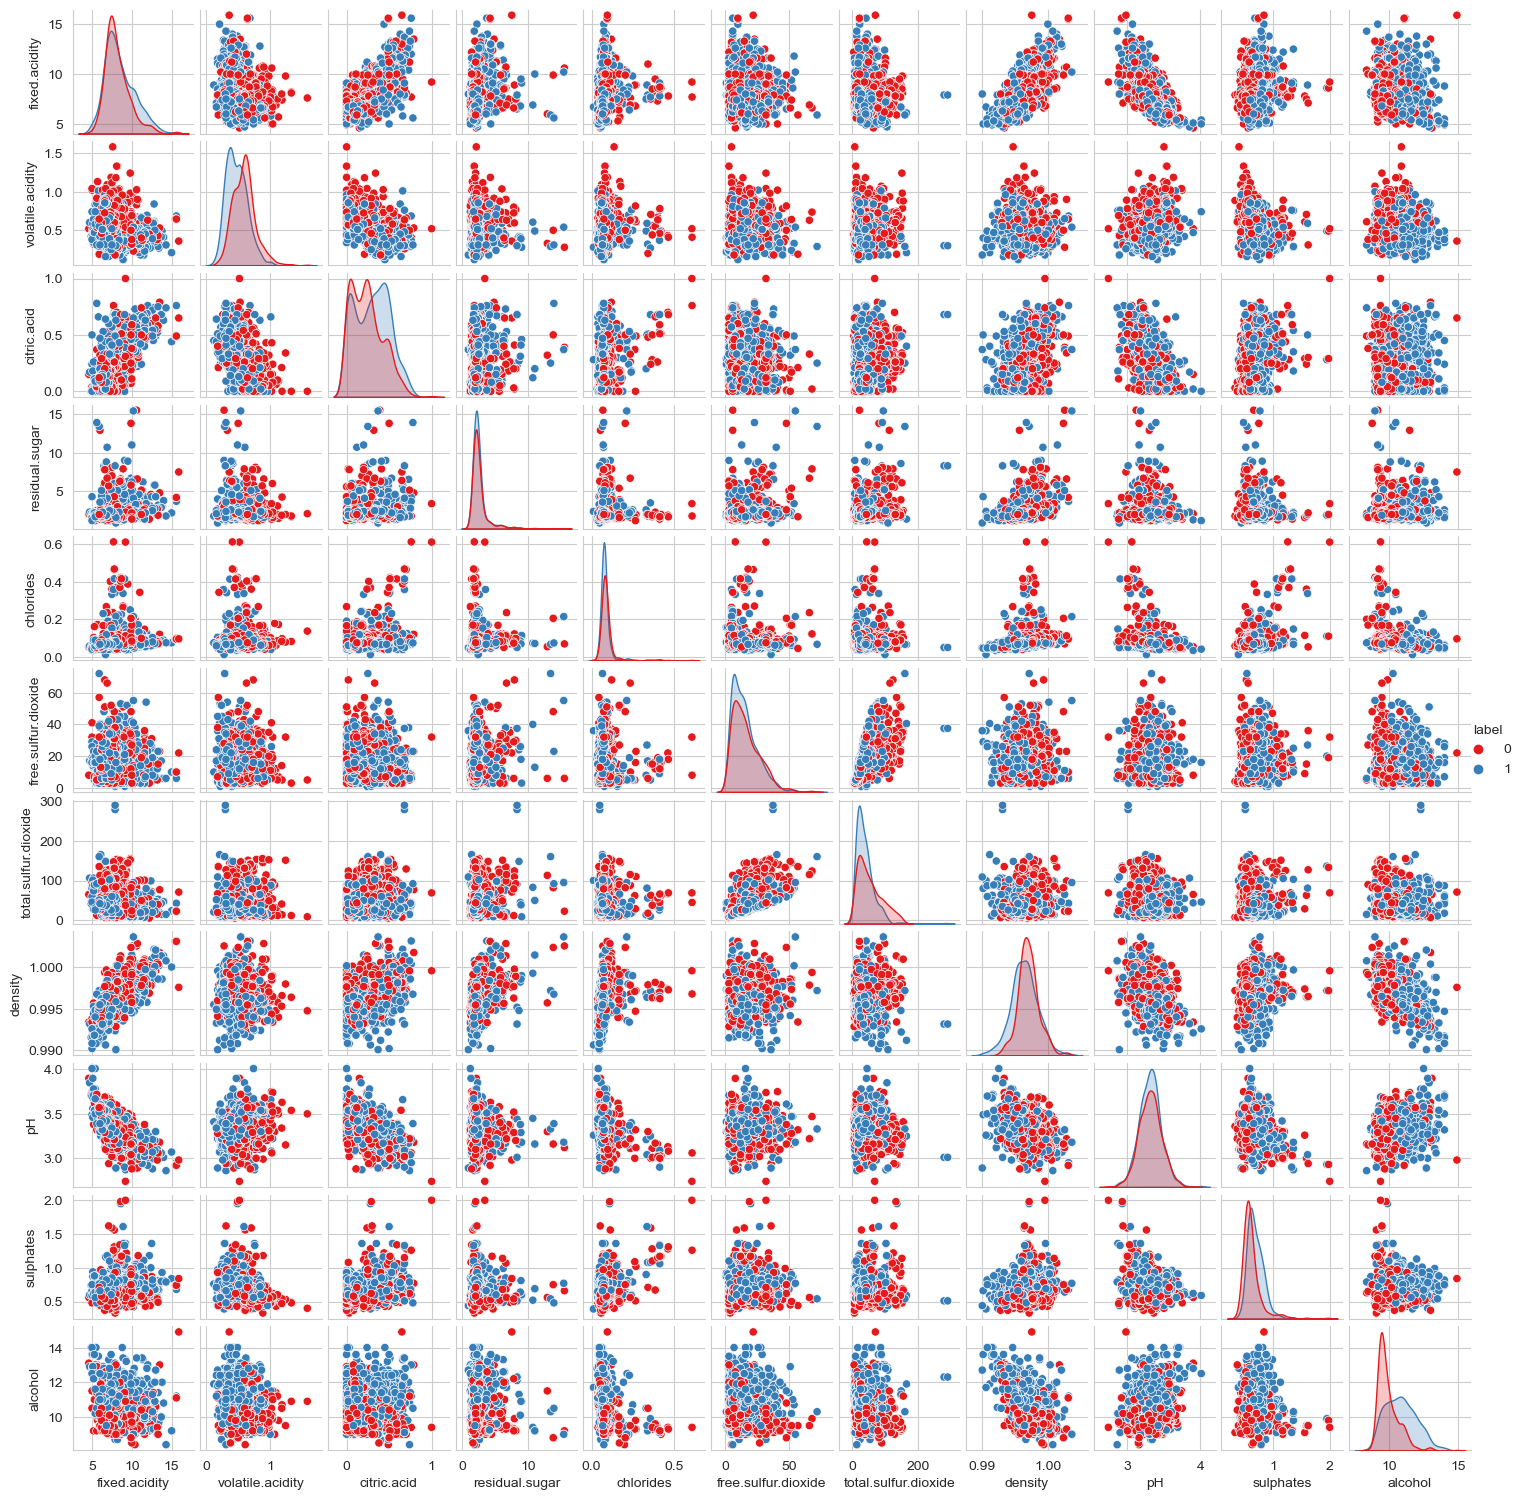

In [10]:
# melihat pairplot untuk melihat hubungan antar fitur
sns.pairplot(df, hue='label', palette='Set1', diag_kind='kde')
plt.gcf().set_size_inches(15, 15)
plt.show()

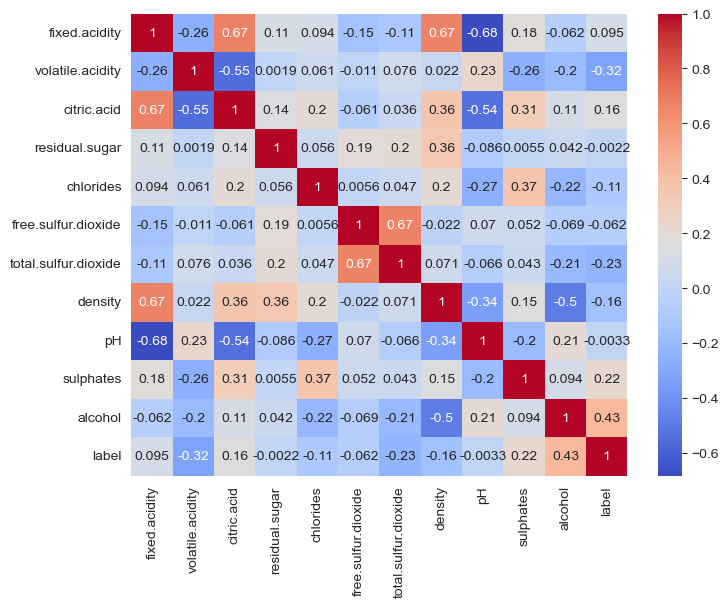

In [11]:
# melihat korelasi antar kolom
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

Informasi yang didapatkan dari tahapan Multivariate Analysis:
- Kolom **label** memiliki korelasi negatif yang cukup tinggi dengan kolom **volatile acidity** dan **total sulfur dioxide**.
- Kolom **label** memiliki korelasi positif yang cukup tinggi dengan kolom **alcohol** dan **sulphates**.

## C. Data Preparation
### Handling Outlier

In [12]:
# handling outlier menggunakan metode IQR
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

lower_fence = Q1 - 1.5 * IQR
upper_fence = Q3 + 1.5 * IQR
outliers = df[(df < lower_fence) | (df > upper_fence)].count()

# melihat outlier
print("Total Data:", df.shape[0])
print("Total Outliers:", outliers.sum())
outliers

Total Data: 1599
Total Outliers: 573


fixed.acidity            49
volatile.acidity         19
citric.acid               1
residual.sugar          155
chlorides               112
free.sulfur.dioxide      30
total.sulfur.dioxide     55
density                  45
pH                       35
sulphates                59
alcohol                  13
label                     0
dtype: int64

In [13]:
# exclude outlier
df = df[~((df<(Q1-1.5*IQR))|(df>(Q3+1.5*IQR))).any(axis=1)]

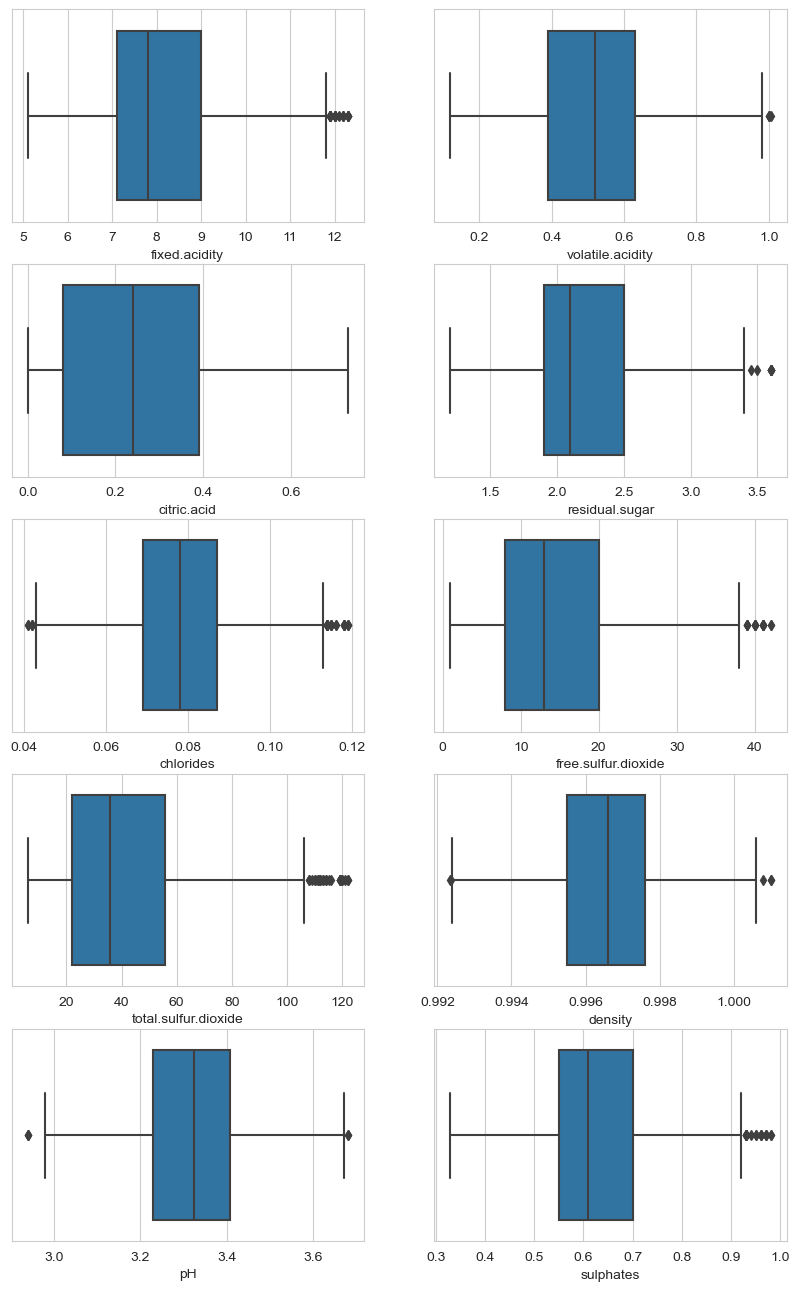

In [14]:
# melihat boxplot fitur setelah handling outlier
sns.set_style('whitegrid')
fig, ax = plt.subplots(5, 2, figsize=(10, 16))
for variable, subplot in zip(df.columns, ax.flatten()):
    if variable == 'label':
        continue
    sns.boxplot(x=variable, data=df, ax=subplot)

In [15]:
# melihat bentuk data setelah handling outlier
df.shape

(1194, 12)

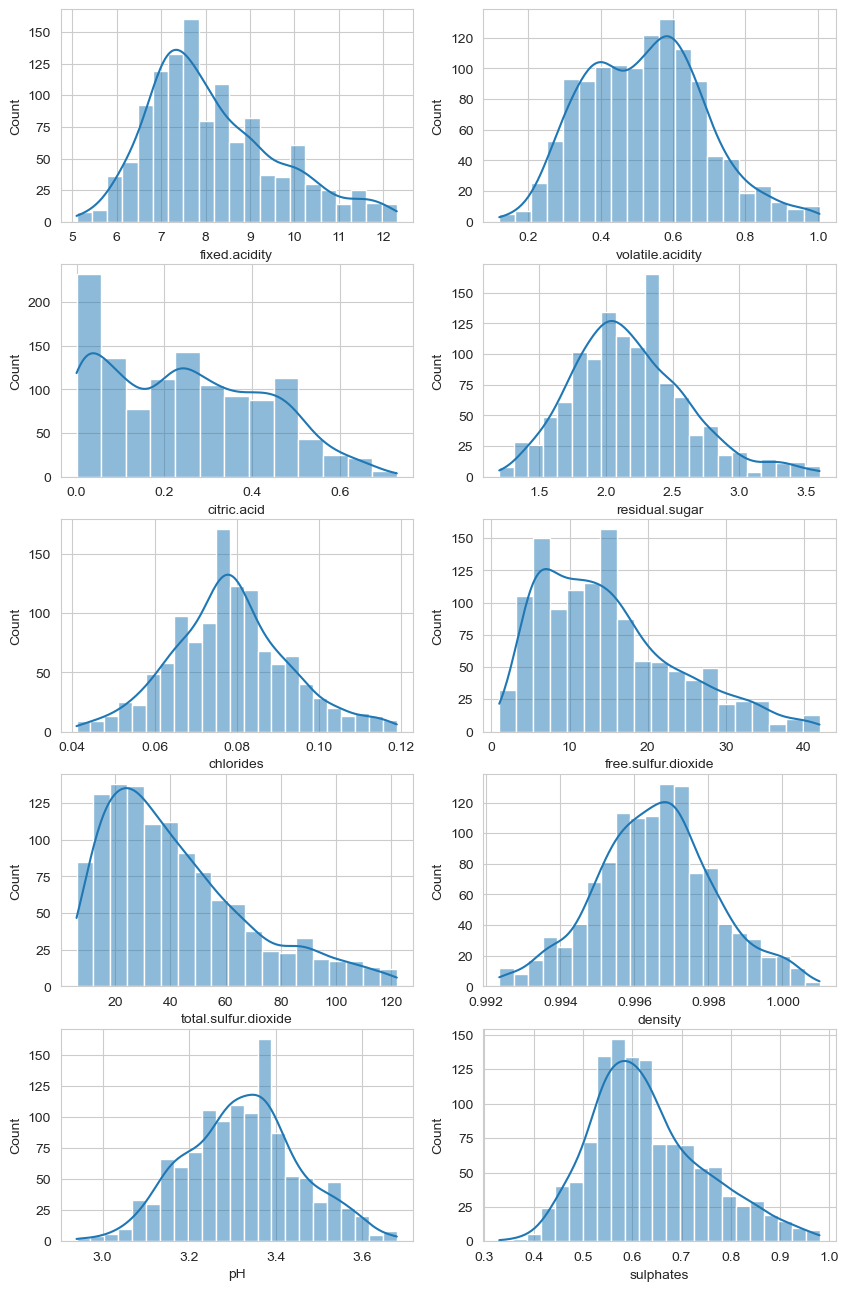

In [16]:
# melihat distribusi fitur setelah handling outlier
sns.set_style('whitegrid')
fig, ax = plt.subplots(5, 2, figsize=(10, 16))
for variable, subplot in zip(df.columns, ax.flatten()):
    if variable == 'label':
        continue
    sns.histplot(x=variable, data=df, ax=subplot, kde=True)

### Feature Engineering: Transformation

In [17]:
# transformasi data menggunakan metode logaritma
col = df.columns.drop('label')

df[col] = df[col].apply(lambda x: np.log(x + 1))

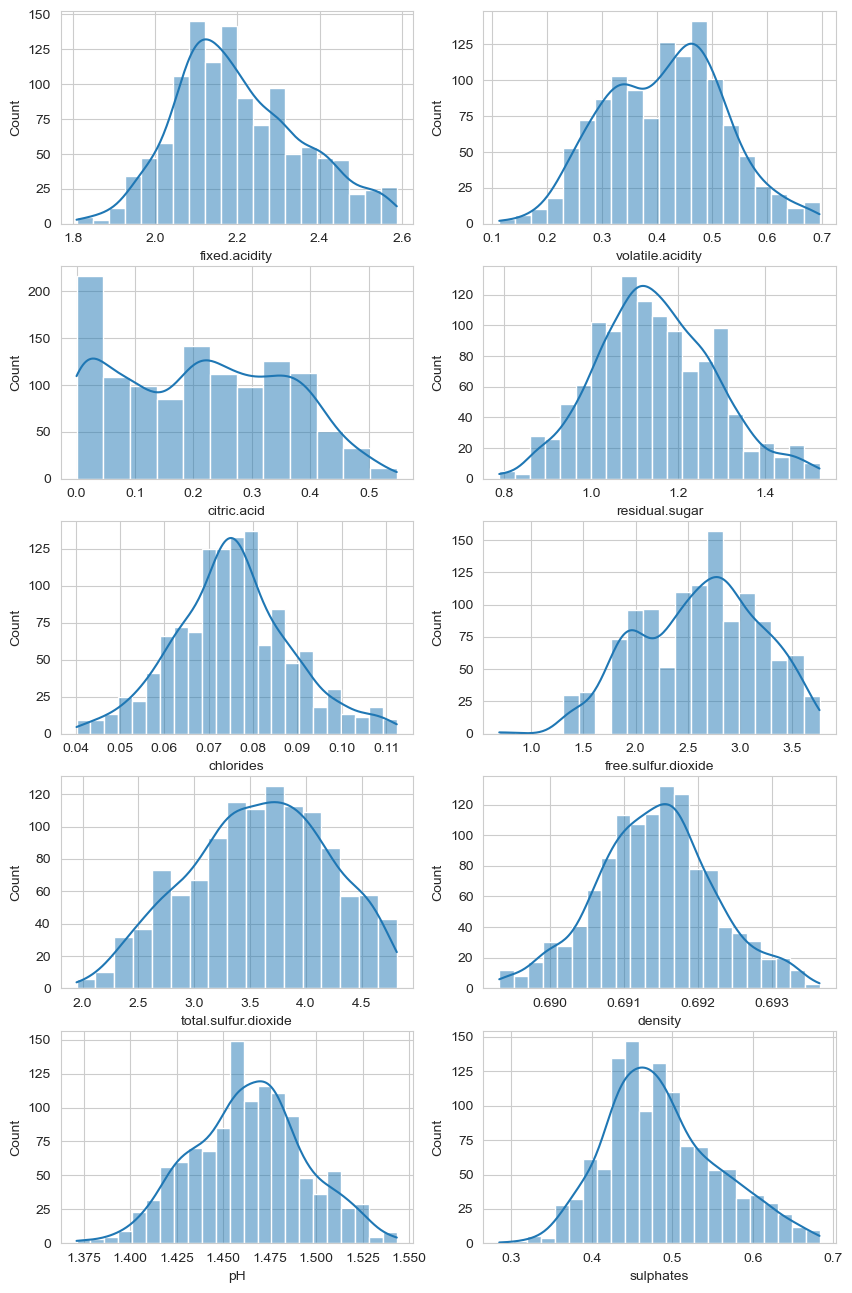

In [18]:
# melihat distribusi fitur setelah transformasi
sns.set_style('whitegrid')
fig, ax = plt.subplots(5, 2, figsize=(10, 16))
for variable, subplot in zip(df.columns, ax.flatten()):
    if variable == 'label':
        continue
    sns.histplot(x=variable, data=df, ax=subplot, kde=True)

### Splitting Data

In [19]:
# memisahkan data menjadi fitur dan label
X = df.drop('label', axis=1)
y = df['label']

In [20]:
# Splitting the dataset into the Training set and Test set
import sklearn
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

### Standardization

In [21]:
# standardize the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

col = X_train.columns

X_train[col] = sc.fit_transform(X_train[col])
X_test[col] = sc.fit_transform(X_test[col])

In [22]:
# melihat data setelah standardize X_train
X_train.head()

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol
171,-0.009561,-0.598713,-0.347487,-0.319908,-0.352299,-1.153842,-1.006389,0.426513,-0.260717,-0.177338,-1.260776
790,-0.458643,-0.933538,1.057452,1.031685,0.298117,0.546236,1.347741,0.351094,0.045354,0.428429,-0.686317
792,-0.695364,0.574255,-1.308062,0.822848,0.226116,0.454182,1.441140,0.583621,1.168466,-0.266020,-0.686317
1395,0.410528,0.999545,-0.779418,-1.380748,1.014485,-2.106635,-1.612308,0.583621,-0.107327,0.171965,-0.855786
102,0.062364,0.189326,-0.287902,-0.571228,0.154049,0.026299,0.014010,0.426513,-0.183933,-0.355258,-1.498484


In [23]:
# melihat data setelah standardize X_test
X_test.head()

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol
759,0.437209,-0.580909,-0.219102,0.625314,0.813615,1.700623,1.446832,0.948331,-0.963543,-0.949246,-1.231533
866,-1.031959,-0.143135,-0.162038,0.196526,-0.568325,0.071498,-0.603153,-1.417113,0.684955,1.726538,0.992372
936,0.437209,-1.384169,0.692373,0.196526,-1.303052,0.726368,1.126882,-0.771539,0.538529,0.832835,1.465705
305,1.353886,0.097878,1.177417,0.625314,-1.101918,-1.201148,-0.539832,1.911632,-1.506264,-0.300162,-1.115639
78,-1.115011,1.320137,-0.754990,-0.498026,0.421506,-0.064567,1.294770,-0.544133,0.465066,-0.949246,-0.227067


## D. Modelling
### Melihat Performa Beberapa Model

In [24]:
import lazypredict
from lazypredict.Supervised import LazyClassifier

clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)
models

100%|██████████| 29/29 [00:03<00:00,  9.51it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
ExtraTreesClassifier,0.81,0.81,0.81,0.81,0.32
RandomForestClassifier,0.79,0.79,0.79,0.79,0.43
BaggingClassifier,0.78,0.78,0.78,0.78,0.10
RidgeClassifierCV,0.77,0.78,0.78,0.77,0.03
LogisticRegression,0.77,0.78,0.78,0.77,0.04
LGBMClassifier,0.78,0.77,0.77,0.78,0.21
LinearDiscriminantAnalysis,0.77,0.77,0.77,0.77,0.04
RidgeClassifier,0.77,0.77,0.77,0.77,0.06
LinearSVC,0.77,0.77,0.77,0.77,0.10


Setelah itu, data akan dilatih secara manual dengan beberapa model yang berbeda, yaitu: **ExtraTreesClassifier**, **RandomForestClassifier**, **LogisticRegression**, **LinearSVC**, dan **CalibratedClassifierCV**.

Setelah itu, akan dilakukan evaluasi terhadap model-model tersebut.

In [25]:
# import library models
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.calibration import CalibratedClassifierCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn import metrics

### ExtraTreesClassifier

In [26]:
ETC = ExtraTreesClassifier()
ETC = ETC.fit(X_train, y_train)

# prediksi y
y_pred_ETC = ETC.predict(X_test)

# melihat hasil akurasinya
score_train_ETC = ETC.score(X_train, y_train)
score_test_ETC = ETC.score(X_test, y_test)
print("Score Train:", score_train_ETC)
print("Score Test:", score_test_ETC)

Score Train: 1.0
Score Test: 0.8022284122562674


### RandomForestClassifier

In [27]:
RFC = RandomForestClassifier()
RFC = RFC.fit(X_train, y_train)

# prediksi y
y_pred_RFC = RFC.predict(X_test)

# melihat hasil akurasinya
score_train_RFC = RFC.score(X_train, y_train)
score_test_RFC = RFC.score(X_test, y_test)
print("Score Train:", score_train_RFC)
print("Score Test:", score_test_RFC)

Score Train: 1.0
Score Test: 0.7938718662952646


### LogisticRegression

In [28]:
LogReg = LogisticRegression()
LogReg = LogReg.fit(X_train, y_train)

# prediksi y
y_pred_LogReg = LogReg.predict(X_test)

# melihat hasil akurasinya
score_test_LogReg = LogReg.score(X_test, y_test)
score_train_LogReg = LogReg.score(X_train, y_train)
print("Score Train:", score_train_LogReg)
print("Score Test:", score_test_LogReg)

Score Train: 0.7413173652694611
Score Test: 0.7743732590529248


In [29]:
# hyperparameter tuning untuk mencari parameter terbaik
param_logreg = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'penalty': ['l1', 'l2']}

search_logreg = GridSearchCV(LogReg, param_logreg, cv=10, scoring='accuracy', n_jobs=-1, verbose=1)
search_logreg.fit(X_train, y_train)

print("Best Parameter:", search_logreg.best_params_)

Fitting 10 folds for each of 14 candidates, totalling 140 fits
Best Parameter: {'C': 0.1, 'penalty': 'l2'}


In [30]:
LogReg_tuned = LogisticRegression(C=0.1, penalty='l2')
LogReg_tuned = LogReg_tuned.fit(X_train, y_train)

# prediksi y
y_pred_LogReg_tuned = LogReg_tuned.predict(X_test)

# melihat hasil akurasinya
score_test_LogReg_tuned = LogReg_tuned.score(X_test, y_test)
score_train_LogReg_tuned = LogReg_tuned.score(X_train, y_train)
print("Score Train:", score_train_LogReg_tuned)
print("Score Test:", score_test_LogReg_tuned)

Score Train: 0.7413173652694611
Score Test: 0.7799442896935933


### LinearSVC

In [31]:
LSVC = LinearSVC()
LSVC = LSVC.fit(X_train, y_train)

# prediksi y
y_pred_LSVC = LSVC.predict(X_test)

# melihat hasil akurasinya
score_train_LSVC = LSVC.score(X_train, y_train)
score_test_LSVC = LSVC.score(X_test, y_test)
print("Score Train:", score_train_LSVC)
print("Score Test:", score_test_LSVC)

Score Train: 0.7401197604790419
Score Test: 0.7715877437325905


### CalibratedClassifierCV

In [32]:
CCV = CalibratedClassifierCV()
CCV = CCV.fit(X_train, y_train)

# prediksi y
y_pred_CCV = CCV.predict(X_test)

# melihat hasil akurasinya
score_train_CCV = CCV.score(X_train, y_train)
score_test_CCV = CCV.score(X_test, y_test)

print("Score Train:", score_train_CCV)
print("Score Test:", score_test_CCV)

Score Train: 0.7389221556886227
Score Test: 0.7715877437325905


Dari beberapa model di atas, rata-rata akurasi yang didapatkan berkisar di nilai 0.77 - 0.81. Namun, model yang memiliki akurasi tertinggi adalah **ExtraTreesClassifier** dengan akurasi sebesar 0.81.

Akan tetapi, kita akan mencoba voting classifier untuk menggabungkan beberapa model yang telah kita latih sebelumnya.

### Voting Classifier: Hard Voting

In [33]:
from sklearn.ensemble import VotingClassifier

In [34]:
# membuat base model voting
clf_list = [('ExtraTreesClassifier', ETC), ('RandomForestClassifier', RFC), ('LogisticRegression', LogReg_tuned), ('LinearSVC', LSVC), ('CalibratedClassifierCV', CCV)]

# Melihat masing-masing akurasi dari berbagai model
for model_tuple in clf_list:
    model1 = model_tuple[1]
    model1.fit(X_train, y_train)
    y_pred1 = model1.predict(X_test)
    acc = metrics.accuracy_score(y_pred1, y_test)
    print(f"{model_tuple[0]}'s accuraccy : {acc:.2f}")

ExtraTreesClassifier's accuraccy : 0.80
RandomForestClassifier's accuraccy : 0.81
LogisticRegression's accuraccy : 0.78
LinearSVC's accuraccy : 0.77
CalibratedClassifierCV's accuraccy : 0.77


In [35]:
HardVote = VotingClassifier(clf_list, voting='hard')
HardVote.fit(X_train, y_train)

y_pred_hard = HardVote.predict(X_test)

# melihat hasil akurasinya
score_train_HardVote = HardVote.score(X_train, y_train)
score_test_HardVote = HardVote.score(X_test, y_test)

print("Score Train:", score_train_HardVote)
print("Score Test:", score_test_HardVote)

Score Train: 0.7508982035928143
Score Test: 0.7743732590529248


## E. Evaluation

In [36]:
# melakukan cross validation untuk mengecek overfitting
from sklearn.model_selection import cross_val_score

model_list = [('ETC', ETC), ('RFC', RFC), ('LogReg_tuned', LogReg_tuned), ('LSVC', LSVC), ('CCV', CCV), ('HardVote', HardVote)]
val_result = []

for model in model_list:
    scores = cross_val_score(model[1], X_train, y_train, cv=10, scoring='accuracy')
    val_result.append(scores)
    print(f"{model[0]}: {scores.mean():.2f} (+/- {scores.std():.2f})")

ETC: 0.79 (+/- 0.05)
RFC: 0.79 (+/- 0.06)
LogReg_tuned: 0.74 (+/- 0.05)
LSVC: 0.73 (+/- 0.04)
CCV: 0.74 (+/- 0.04)
HardVote: 0.74 (+/- 0.04)


In [37]:
# perbandingan akurasi dari berbagai model
acc = pd.DataFrame({'Score Train': [score_train_ETC, score_train_RFC, score_train_LogReg_tuned, score_train_LSVC, score_train_CCV, score_train_HardVote], 'Score Test': [score_test_ETC, score_test_RFC, score_test_LogReg_tuned, score_test_LSVC, score_test_CCV, score_test_HardVote]}, index=['ETC', 'RFC', 'LogReg_tuned', 'LSVC', 'CCV', 'HardVote'])
acc['CV Mean'] = [val_result[0].mean(), val_result[1].mean(), val_result[2].mean(), val_result[3].mean(), val_result[4].mean(), val_result[5].mean()]
acc['CV Std'] = [val_result[0].std(), val_result[1].std(), val_result[2].std(), val_result[3].std(), val_result[4].std(), val_result[5].std()]
acc

,Score Train,Score Test,CV Mean,CV Std
ETC,1.00,0.80,0.79,0.05
RFC,1.00,0.79,0.79,0.06
LogReg_tuned,0.74,0.78,0.74,0.05
LSVC,0.74,0.77,0.73,0.04
CCV,0.74,0.77,0.74,0.04
HardVote,0.75,0.77,0.74,0.04


In [38]:
# melihat confusion matrix
cm_ETC = confusion_matrix(y_test, y_pred_ETC)
cm_RFC = confusion_matrix(y_test, y_pred_RFC)
cm_LogReg_tuned = confusion_matrix(y_test, y_pred_LogReg_tuned)
cm_LSVC = confusion_matrix(y_test, y_pred_LSVC)
cm_CCV = confusion_matrix(y_test, y_pred_CCV)
cm_HardVote = confusion_matrix(y_test, y_pred_hard)

print("Confusion Matrix ETC:\n", cm_ETC)
print("\nConfusion Matrix RFC:\n", cm_RFC)
print("\nConfusion Matrix LogReg_tuned:\n", cm_LogReg_tuned)
print("\nConfusion Matrix LSVC:\n", cm_LSVC)
print("\nConfusion Matrix CCV:\n", cm_CCV)
print("\nConfusion Matrix HardVote:\n", cm_HardVote)

Confusion Matrix ETC:
 [[132  37]
 [ 34 156]]

Confusion Matrix RFC:
 [[132  37]
 [ 37 153]]

Confusion Matrix LogReg_tuned:
 [[134  35]
 [ 44 146]]

Confusion Matrix LSVC:
 [[132  37]
 [ 45 145]]

Confusion Matrix CCV:
 [[132  37]
 [ 45 145]]

Confusion Matrix HardVote:
 [[133  36]
 [ 45 145]]


In [39]:
# melihat classification report
cr_ETC = classification_report(y_test, y_pred_ETC)
cr_RFC = classification_report(y_test, y_pred_RFC)
cr_LogReg_tuned = classification_report(y_test, y_pred_LogReg_tuned)
cr_LSVC = classification_report(y_test, y_pred_LSVC)
cr_CCV = classification_report(y_test, y_pred_CCV)
cr_HardVote = classification_report(y_test, y_pred_hard)

In [40]:
print("Classification Report ETC:\n", cr_ETC)

Classification Report ETC:
               precision    recall  f1-score   support

           0       0.80      0.78      0.79       169
           1       0.81      0.82      0.81       190

    accuracy                           0.80       359
   macro avg       0.80      0.80      0.80       359
weighted avg       0.80      0.80      0.80       359



In [41]:
print("\nClassification Report RFC:\n", cr_RFC)


Classification Report RFC:
               precision    recall  f1-score   support

           0       0.78      0.78      0.78       169
           1       0.81      0.81      0.81       190

    accuracy                           0.79       359
   macro avg       0.79      0.79      0.79       359
weighted avg       0.79      0.79      0.79       359



In [42]:
print("\nClassification Report LogReg_tuned:\n", cr_LogReg_tuned)


Classification Report LogReg_tuned:
               precision    recall  f1-score   support

           0       0.75      0.79      0.77       169
           1       0.81      0.77      0.79       190

    accuracy                           0.78       359
   macro avg       0.78      0.78      0.78       359
weighted avg       0.78      0.78      0.78       359



In [43]:
print("\nClassification Report LSVC:\n", cr_LSVC)


Classification Report LSVC:
               precision    recall  f1-score   support

           0       0.75      0.78      0.76       169
           1       0.80      0.76      0.78       190

    accuracy                           0.77       359
   macro avg       0.77      0.77      0.77       359
weighted avg       0.77      0.77      0.77       359



In [44]:
print("\nClassification Report CCV:\n", cr_CCV)


Classification Report CCV:
               precision    recall  f1-score   support

           0       0.75      0.78      0.76       169
           1       0.80      0.76      0.78       190

    accuracy                           0.77       359
   macro avg       0.77      0.77      0.77       359
weighted avg       0.77      0.77      0.77       359



In [45]:
print("\nClassification Report HardVote:\n", cr_HardVote)


Classification Report HardVote:
               precision    recall  f1-score   support

           0       0.75      0.79      0.77       169
           1       0.80      0.76      0.78       190

    accuracy                           0.77       359
   macro avg       0.77      0.78      0.77       359
weighted avg       0.78      0.77      0.77       359



## F. Saving Model

In [46]:
import pickle

model_list = [('ETC', ETC), ('RFC', RFC), ('LogReg_tuned', LogReg_tuned), ('LSVC', LSVC), ('CCV', CCV), ('HardVote', HardVote)]

for model in model_list:
    pickle.dump(model[1], open("model/"+model[0], 'wb'))
    temp = model[1].predict(X_test)
    print(f"{model[0]} accuracy: {metrics.accuracy_score(y_test, temp):.2f}")
    print(f"{model[0]} has been saved")
    print()

ETC accuracy: 0.80
ETC has been saved

RFC accuracy: 0.81
RFC has been saved

LogReg_tuned accuracy: 0.78
LogReg_tuned has been saved

LSVC accuracy: 0.77
LSVC has been saved

CCV accuracy: 0.77
CCV has been saved

HardVote accuracy: 0.77
HardVote has been saved

